<a href="https://colab.research.google.com/github/nakul-jindal/Reddit-post-classification/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
posts = pd.read_csv('totalfinaldata.csv')
posts
for i in range(0, len(posts)):
  if posts['flare'][i]=='Food':
    posts['flare'][i]='food'

In [ ]:
X=posts.iloc[:,1].values
y=posts.iloc[:,4].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [ ]:
import re
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
corpus_train = []
for i in range(0, len(X_train)):
    title = re.sub('[^a-zA-Z?]', ' ', X_train[i])
    title = title.lower()
    title = title.split()
    ps = PorterStemmer()
    title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
    title = ' '.join(title)
    corpus_train.append(title)

In [ ]:
cv = CountVectorizer()  #max_features = 15000
X_train = cv.fit_transform(corpus_train).toarray()

In [ ]:
corpus_test = []
for i in range(0, len(X_test)):
    title = re.sub('[^a-zA-Z?]', ' ', X_test[i])
    title = title.lower()
    title = title.split()
    ps = PorterStemmer()
    title = [ps.stem(word) for word in title if not word in set(stopwords.words('english'))]
    title = ' '.join(title)
    corpus_test.append(title)

In [ ]:
cv = CountVectorizer()          #max_features = 3000
X_test = cv.fit_transform(corpus_test).toarray()

In [ ]:
 X_test.shape[1]

3120

In [ ]:
from sklearn.feature_selection import VarianceThreshold
print("Number of features before reduction : ", X_train.shape[1])
selection = VarianceThreshold(threshold=0.001)
t = selection.fit_transform(X_train)
print("Number of features after reduction : ", t.shape[1])

Number of features before reduction :  6819
Number of features after reduction :  1914


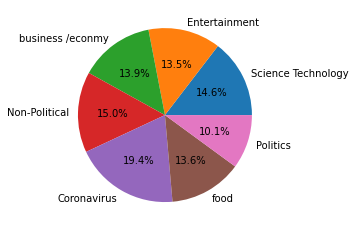

In [ ]:
labels = list(set(y_train))
counts = []
for label in labels:
    counts.append(np.count_nonzero(y_train == label))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.show()